(1.1)

In [1]:
# Importing all needed for the tasks libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import statistics
import statsmodels.formula.api as sm
import seaborn as sns

# Creating a function to display random colors on the pie chart
def generate_random_colors(num_colors):
    colors = [] # an empty list to store the generated color strings
    for _ in range(num_colors): # _ is used as a variable name to indicate that its value is not needed
        r = random.randint(0, 255) # 3 variables are assigned random integers between 0 and 255; 
        g = random.randint(0, 255) # these values represent red, green, and blue components of color
        b = random.randint(0, 255)
        color = f"#{r:02X}{g:02X}{b:02X}" # String color is created in hexadecimal format
        colors.append(color) # The generated color string is appended to the colors list
    return colors

# Continuing working with 'income-expenses' examples
income = np.array([10000, 12000, 15000, 13000, 16000, 18000, 20000, 22000, 25000, 27000, 29000, 30000])
income_without_tax = income * 0.7
expenses = np.array([8000, 10000, 14000, 10000, 8000, 6000, 7000, 5000, 8000, 9000, 8000, 9000])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df = pd.DataFrame({
    'Income without tax':income_without_tax, 
    'Expenses':expenses}, 
    index = months
)
df["Savings"] = df["Income without tax"] - df["Expenses"]
df["Profit"] = df["Savings"] > 0
print("Full DataFrame:")
print(df)
print("\nFirst quarter data:")
print(df.iloc[:3])


Full DataFrame:
     Income without tax  Expenses  Savings  Profit
Jan              7000.0      8000  -1000.0   False
Feb              8400.0     10000  -1600.0   False
Mar             10500.0     14000  -3500.0   False
Apr              9100.0     10000   -900.0   False
May             11200.0      8000   3200.0    True
Jun             12600.0      6000   6600.0    True
Jul             14000.0      7000   7000.0    True
Aug             15400.0      5000  10400.0    True
Sep             17500.0      8000   9500.0    True
Oct             18900.0      9000   9900.0    True
Nov             20300.0      8000  12300.0    True
Dec             21000.0      9000  12000.0    True

First quarter data:
     Income without tax  Expenses  Savings  Profit
Jan              7000.0      8000  -1000.0   False
Feb              8400.0     10000  -1600.0   False
Mar             10500.0     14000  -3500.0   False


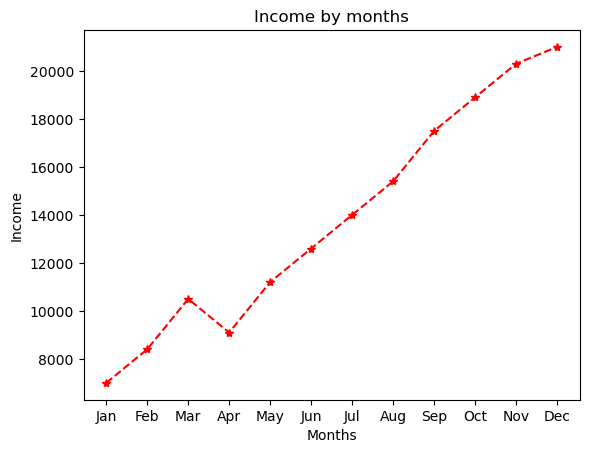

In [2]:
# Creating plot 'Income by months'
x_axis = np.array(months) # Creating arrays for x and y axes
y_axis = np.array(income_without_tax)
# Creating a line plot with markers (*) connected by dashed lines (--) in red color (r)
plt.plot(x_axis, y_axis, '*--r')
plt.xlabel('Months') # Labeling axes
plt.ylabel('Income')
plt.title('Income by months') # Setting a titlefor the plot
plt.show() # Displaying the plot

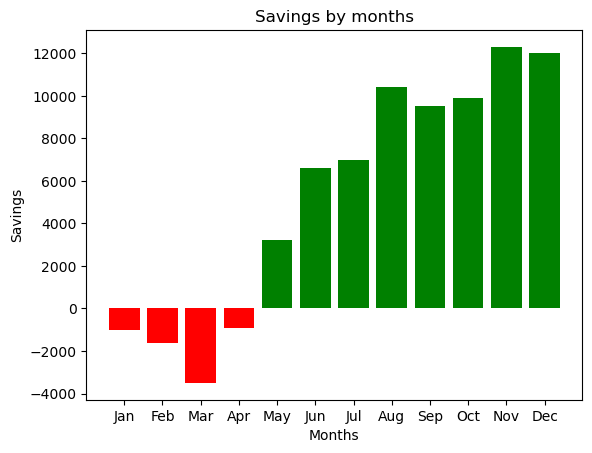

In [3]:
# Creating column chart diagram which shows savings for each month
savings = df['Savings'] # Extracting 'Savings' column from df into 'savings' variable
x_sav = np.array(months) # Creating arrays for x and y axes
y_sav = np.array(savings)
plt.xlabel('Months') # Labeling axes
plt.ylabel('Savings')
plt.title('Savings by months') # Creating a title
# Creating a list of colors where each bar will be red if savings are negative and green if positive
colors = ['red' if saving < 0 else 'green' for saving in savings] 
plt.bar(x_sav, y_sav, color=colors) # Visualizing monthly savings using prepared x and y axes with assigned colors
plt.show() # Displaying the plot

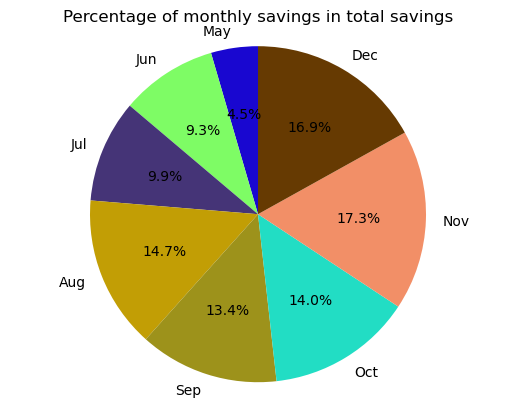

In [4]:
# Creating a pie chart showing the part of each month saving in the total saving of this year
df_pos_savings = df[df["Savings"] >= 0] # Creating new DF containing only rows with non-negative savings
total_sav = df_pos_savings['Savings'].sum() # Calculating total of positive savings
perc_sav = df_pos_savings['Savings']/total_sav*100 # Calculating each month's savings percentage relative to total
# Using previously defined function to generate random colors based on the number of months with positive savings
colors_pie = generate_random_colors(len(df_pos_savings)) 
# Creating a pie chart with percentages displayed on each slice. It starts at 90 degree angle and uses random colors
plt.pie(perc_sav, autopct='%1.1f%%', startangle=90, colors=colors_pie, labels=df_pos_savings.index)
plt.axis('equal') # To ensure the chart is circular the aspect ration is set to equal
plt.title("Percentage of monthly savings in total savings") # Setting the title
plt.show() # Displaying the plot

In [5]:
# Counting average income for quaters
# Creating a dictionary mapping each quarter to its corresponding months
quarters = {
  "Q1": ["Jan", "Feb", "Mar"],
  "Q2": ["Apr", "May", "Jun"],
  "Q3": ["Jul", "Aug", "Sep"],
  "Q4": ["Oct", "Nov", "Dec"]
}
for quarter, months in quarters.items(): # Loop iterates through all quater and its associated months
    quarter_income = df.loc[months, "Income without tax"] # Extracting the income for current quarter with .loc[]
    # Calculating the average income for quarter with mean() function from statistics module
    average_income = statistics.mean(quarter_income)
    formatted_income = format(average_income, ".3f") # Formatting average income to 3 decimal places as a string
    print("Average income for "+quarter+": "+formatted_income)

Average income for Q1: 8633.333
Average income for Q2: 10966.667
Average income for Q3: 15633.333
Average income for Q4: 20066.667


(1.2)

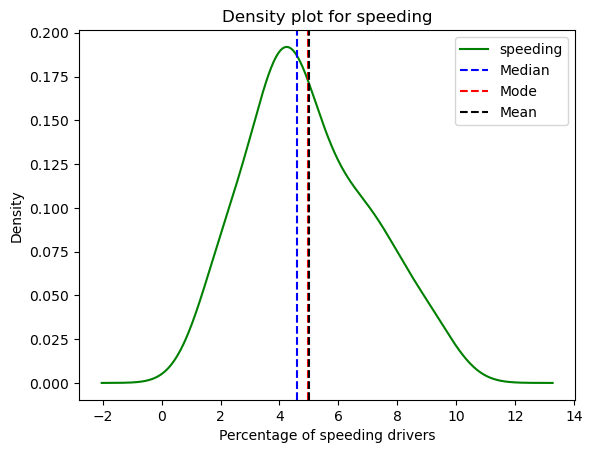

The median of the 'speeding' column is: 4.608
The mode of the 'speeding' column is: 4.968
The mean of the 'speeding' column is: 4.998


In [6]:
# Loading the car_crashes dataset into a DataFrame named df
df = sns.load_dataset("car_crashes")

# Density plot was created together with mean, median and mode calculations
median = df.speeding.median() # Calculating the median
mode = df.speeding.mode()[0] # Calculating the mode, with [0] accessing the first mode value
mean = df.speeding.mean() # Calculating the mean
# Creating a density plot for 'speeding'
df.speeding.plot.density(color='green') # Plot is created with green color
plt.title('Density plot for speeding') # Setting labels for x-axis and title
plt.xlabel('Percentage of speeding drivers')
# Adding a vertical line at the median in blue color
plt.axvline(median, color='blue', linestyle='--', label='Median')
# Adding a vertical line at the mode in red color
plt.axvline(mode, color='red', linestyle='--', label='Mode')
# Adding a vertical line at the mean in black color
plt.axvline(mean, color='black', linestyle='--', label='Mean')
plt.legend() # Displaying the legend with labels for the lines 
plt.show() # Showing the plot

median_format = format(median, ".3f") # Formatting the values to 3 decimal places as strings
mode_format = format(mode, ".3f")
mean_format = format(mean, ".3f")
print("The median of the 'speeding' column is: "+median_format)
print("The mode of the 'speeding' column is: "+mode_format)
print("The mean of the 'speeding' column is: "+mean_format)

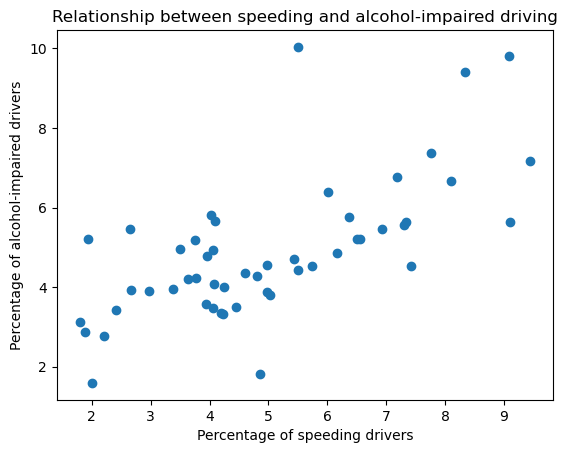

In [7]:
# Creating a scatter plot to see the relationship between 2 variables (speeding and alcohol)
plt.scatter(df.speeding,df.alcohol)
plt.xlabel("Percentage of speeding drivers") # Labeling the axes
plt.ylabel("Percentage of alcohol-impaired drivers")
plt.title("Relationship between speeding and alcohol-impaired driving") # Setting the title
sns.set_style("whitegrid") # Applying a grid style
plt.show() # Displaying the plot

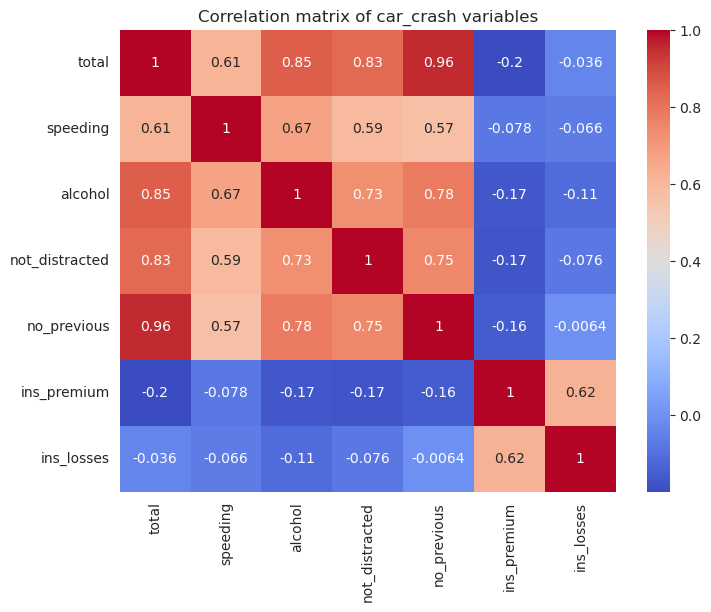

In [8]:
# Creating a heatmap to see the correlation matrix of variables, releaving the relationships between different factors contributing to accidents and insurance outcomes
plt.figure(figsize=(8, 6)) # Creating a figure with specified dimensions for plotting
# Creating a heatmap that is showing correlations between numrical variables in df
# With annot=True adding correlation coefficients inside the cells; using coolwarm colormap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation matrix of car_crash variables") # Setting the title
plt.show() # Displaying the plot

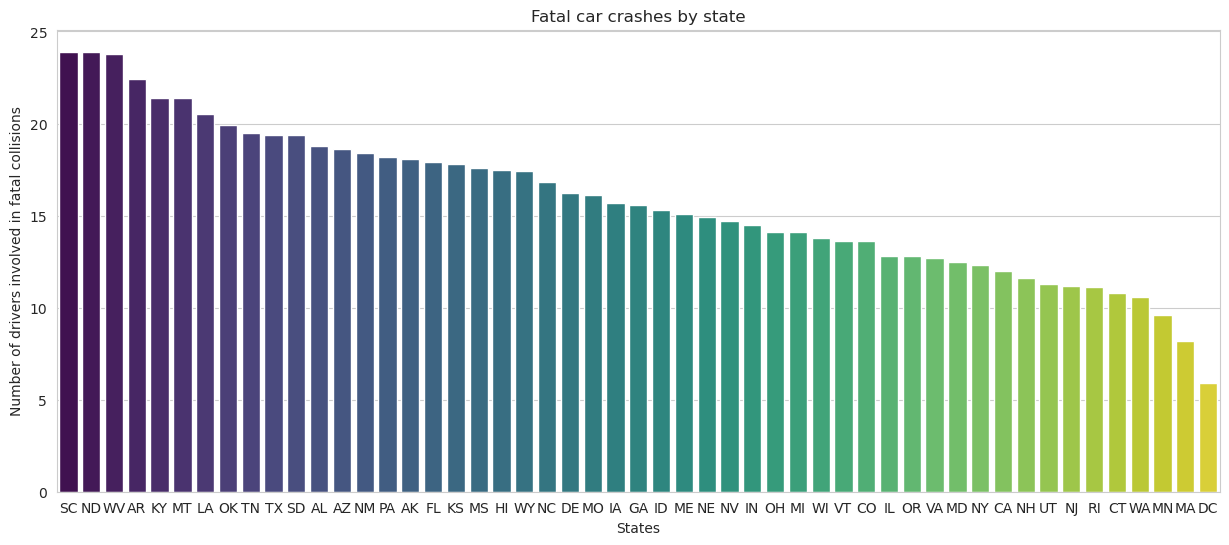

In [11]:
# Creating a barplot showing the number of drivers involved in fatal collisions by state
df_sorted = df.sort_values(by='total', ascending=False) # Sorting values by 'total' column
plt.figure(figsize=(15, 6)) # Creating a figure with specified dimensions for plotting
sns.barplot(x='abbrev', y='total', data=df_sorted, palette='viridis') # Creating the bar plot
plt.xlabel('States') # Adding labels and title 
plt.ylabel('Number of drivers involved in fatal collisions')
plt.title('Fatal car crashes by state')
plt.show() # Displaying the plot

(2.4)

In [9]:
# Example with time complexity O(n^3)
n = 2
res = 0;
for i in range(n):
    for j in range(n):
        for k in range(n):
            res = i * j + k
            print(res)

0
1
0
1
0
1
1
2


(3)

In [10]:
# Calculating factorial with recursion
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)
# Example with 5
print("factorial function result: ")
print(factorial(5))

# Calculating the nth Fibonacci number with recursion
def fibonacci(n):
    if n <= 1:
        return n
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

# Example with 6
print("fibonacci function result: ")
print(fibonacci(6))

factorial function result: 
120
fibonacci function result: 
8
